In [1]:
#'
path <- ".."

#'
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_mixture_model_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_mixture_model_quantile.R"))


In [2]:
library(readr)

In [3]:
data <- xfun::in_dir(dir = path, expr = read_csv("./applications/final_dataset.csv"))

Rows: 22847 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (50): timestamp, latitude, longitude, velocity_latitude, velocity_longit...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
str(data)

spc_tbl_ [22,847 × 50] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ timestamp            : num [1:22847] 17207386 17241310 17274219 17308103 17343083 ...
 $ latitude             : num [1:22847] 48.8 48.8 48.8 48.8 48.8 ...
 $ longitude            : num [1:22847] 2.46 2.46 2.46 2.46 2.46 ...
 $ velocity_latitude    : num [1:22847] NA -1.67e-06 -1.26e-06 -1.27e-06 -1.70e-06 ...
 $ velocity_longitude   : num [1:22847] NA 3.22e-07 2.33e-07 2.28e-07 2.94e-07 ...
 $ velocity             : num [1:22847] NA 1.70e-06 1.28e-06 1.29e-06 1.73e-06 ...
 $ lateral_error        : num [1:22847] -0.589 -0.571 -0.566 -0.56 -0.592 ...
 $ longitudinal_error   : num [1:22847] 0.0639 0.0775 0.0832 0.0979 0.1043 ...
 $ haversine_error      : num [1:22847] 0.592 0.576 0.572 0.569 0.6 ...
 $ area                 : num [1:22847] 0.585 0.555 0.745 0.603 0.376 ...
 $ object               : num [1:22847] 24 20 23 27 19 24 25 24 23 25 ...
 $ name_airplane        : num [1:22847] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_bench   

In [5]:
options(repr.plot.width=19, repr.plot.height=12)

In [8]:
x <- abs(data$haversine_error)

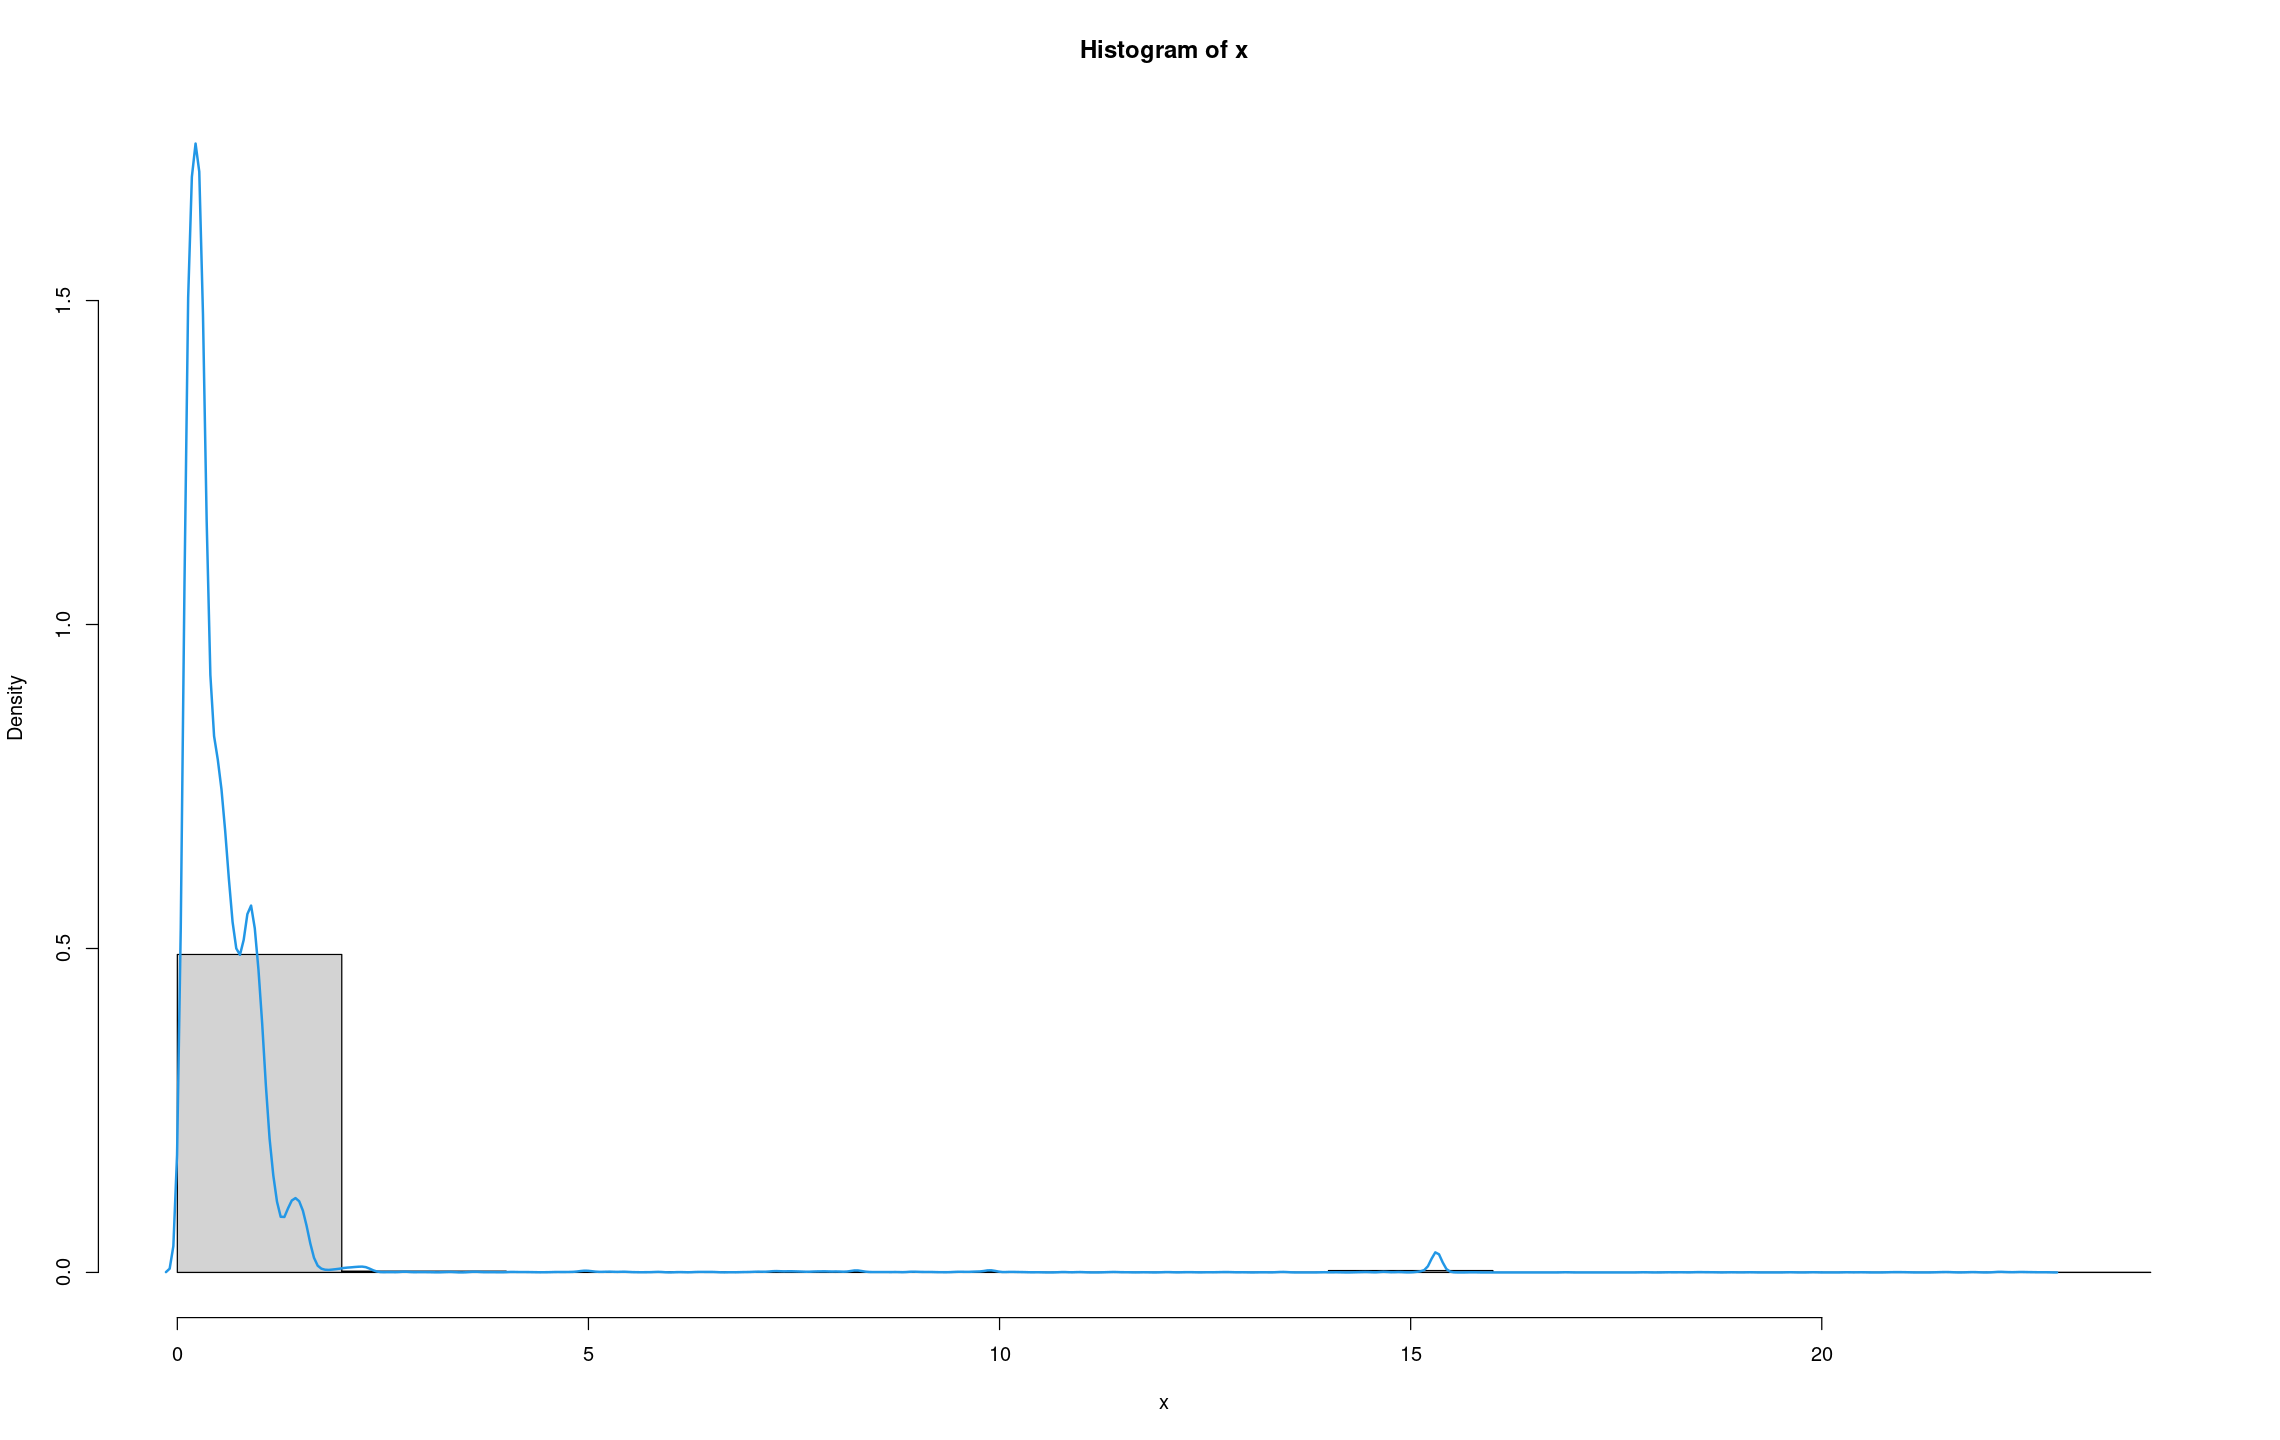

In [9]:
dens_x <- density(x)
hist(x, prob = TRUE, ylim = range(dens_x$y))
lines(dens_x, lwd = 2, col = 4)

In [10]:
threshold_x <- 2.5
x <- x[x <= threshold_x]

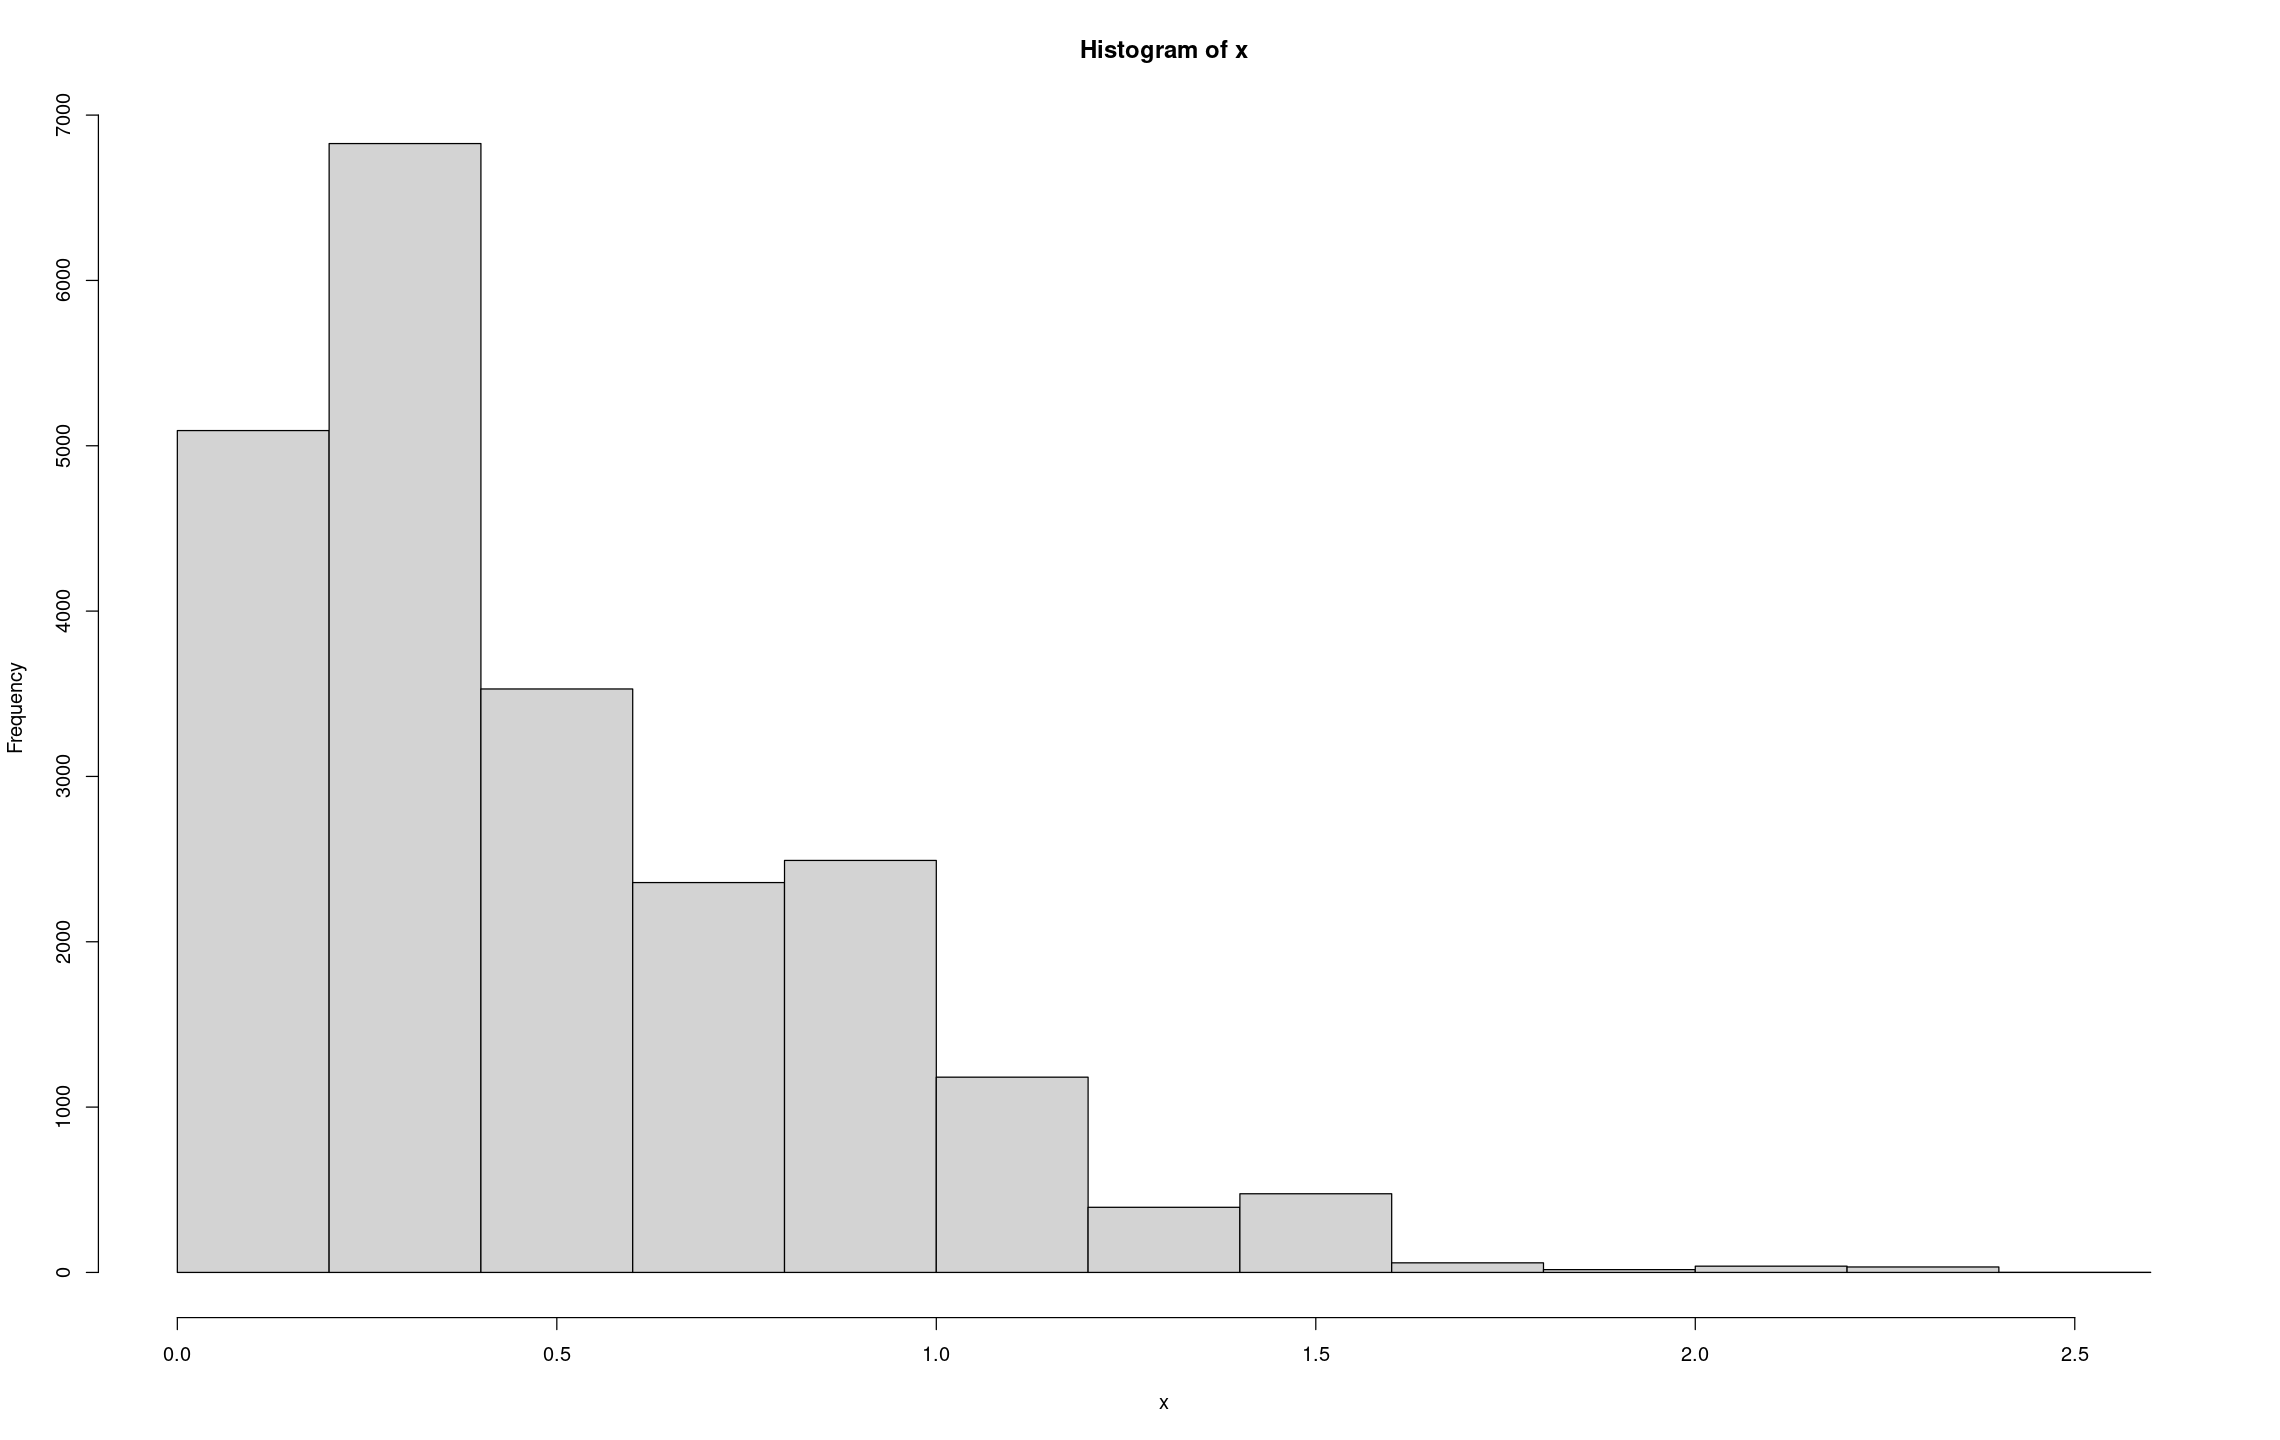

In [11]:
hist(x)

In [12]:
nlargest <- 2000
y <- extract_nlargest_sample(x, n = nlargest)

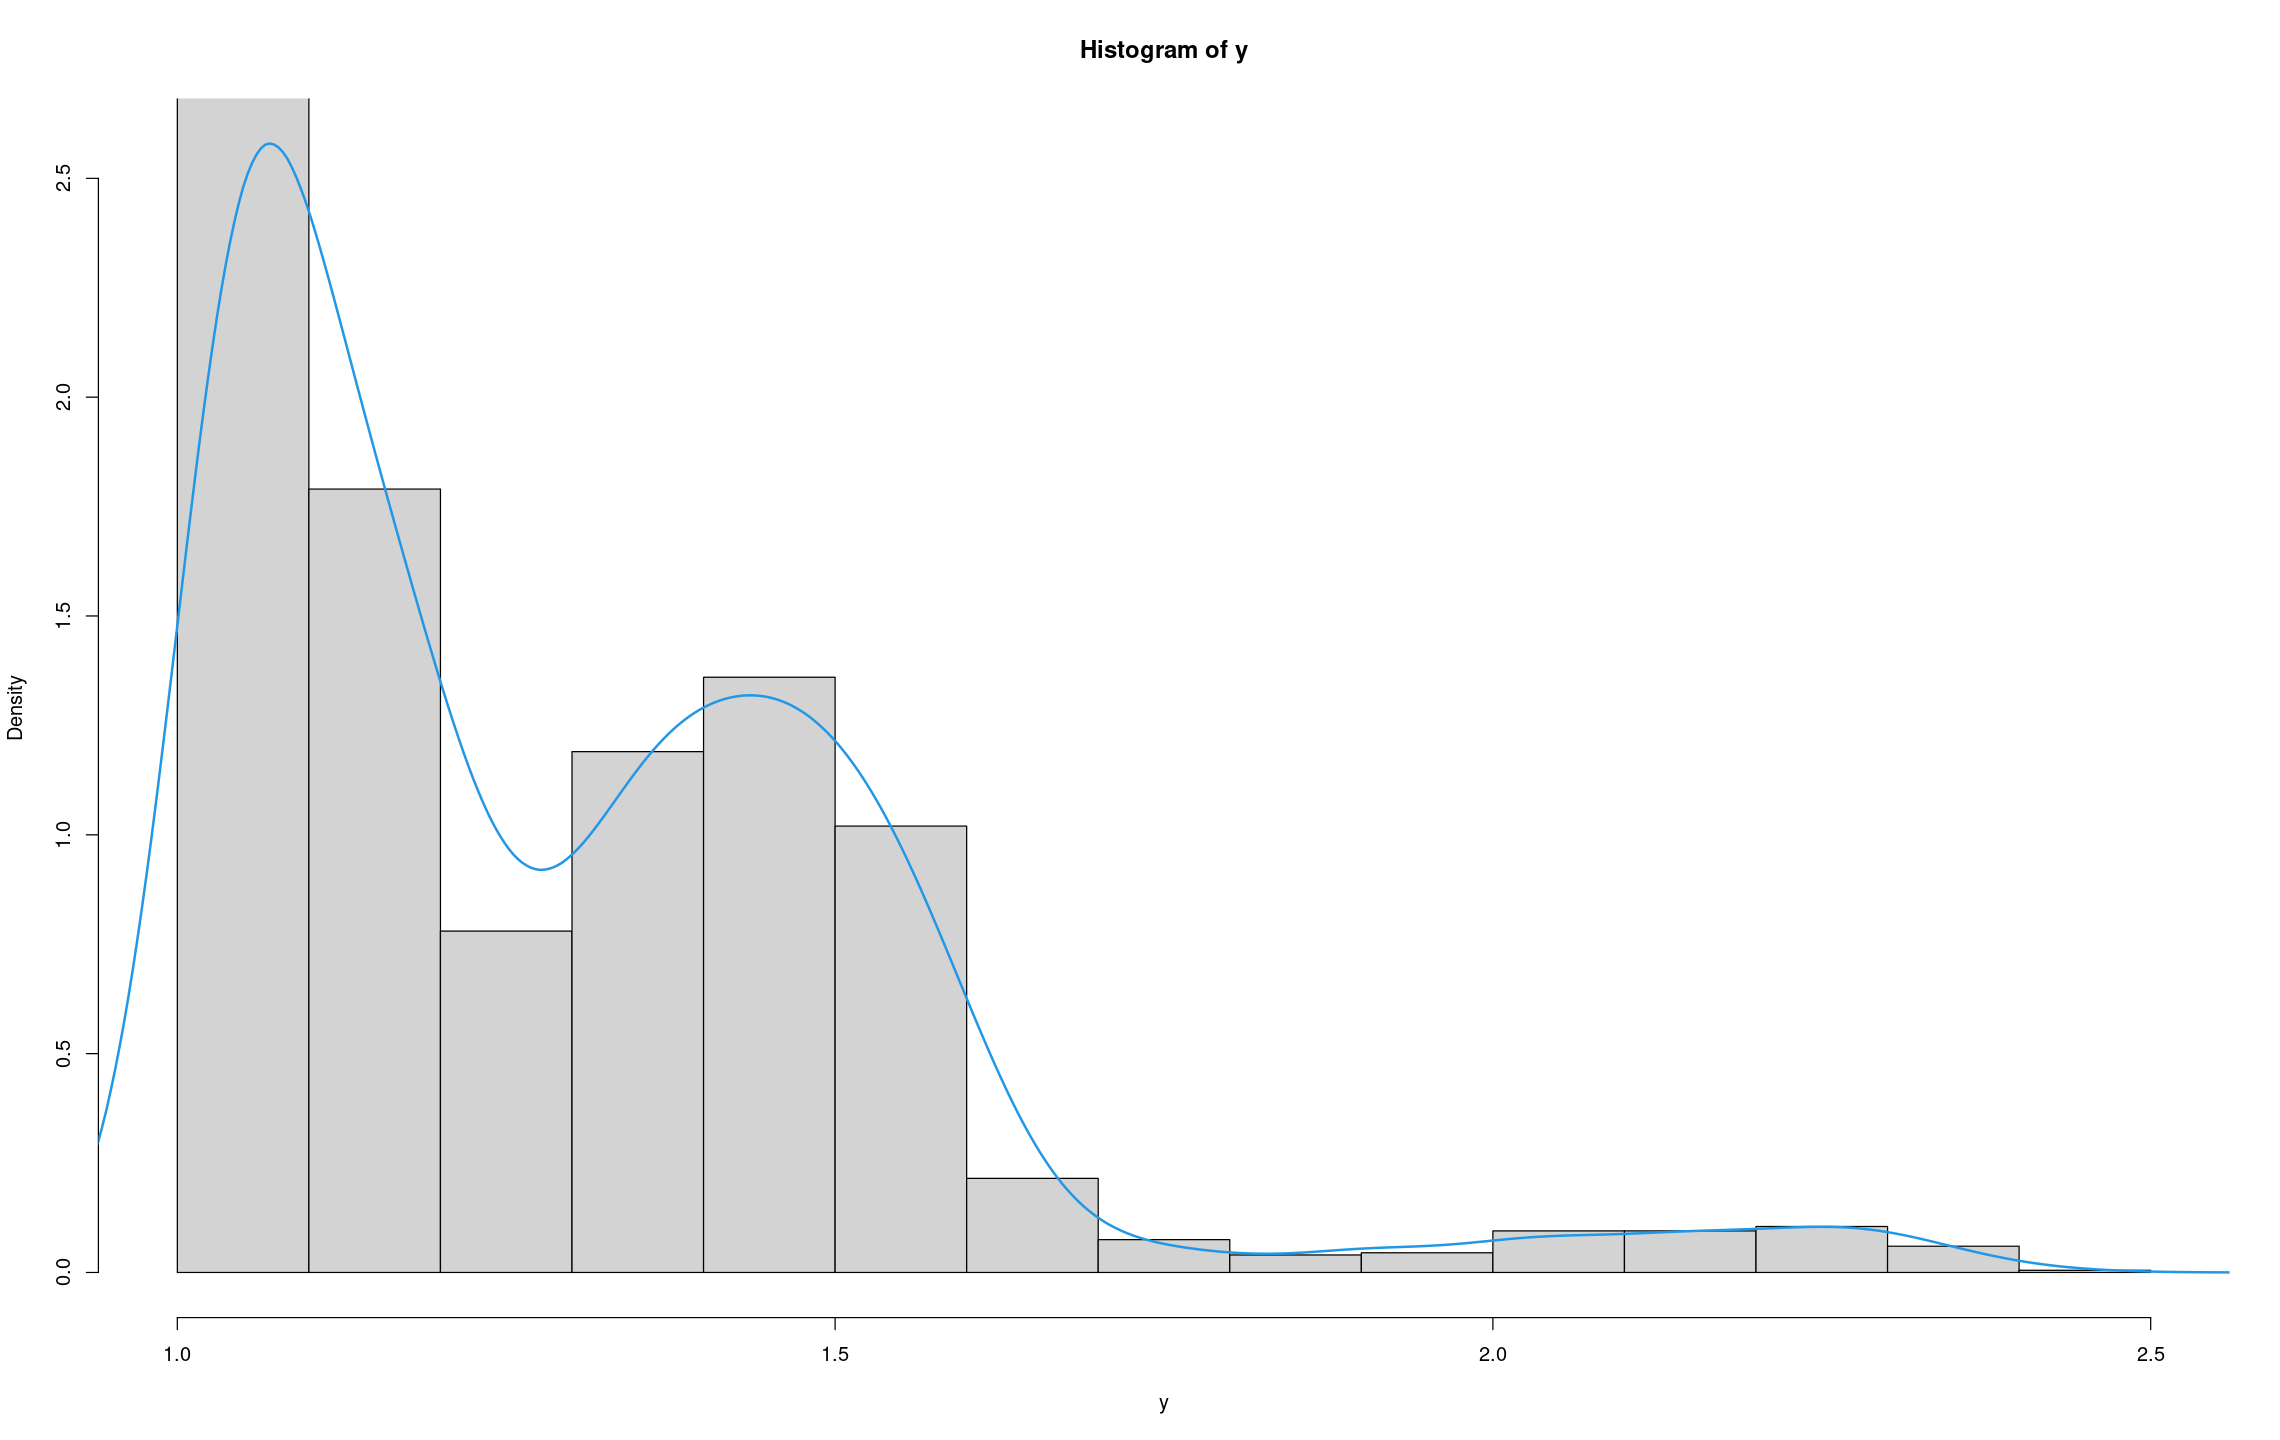

In [13]:
dens_y <- density(y)
hist(y, prob = TRUE, ylim = range(dens_y$y))
lines(density(y), lwd = 2, col = 4)

In [33]:
gev_mixture_model <- suppressWarnings(estimate_gev_mixture_model_parameters(x = x, 
                                                                            block_sizes = 10:40,
                                                                            minimum_nblocks = 50,
                                                                            threshold = min(y),
                                                                            nlargest = nlargest,
                                                                            confidence_level = 0.95,
                                                                            use_extremal_index = TRUE,
                                                                            use_lower_threshold = FALSE,
                                                                            maximum_iterations = 1500,
                                                                            log_mv = TRUE,
                                                                            log_pw = TRUE,
                                                                            trace = FALSE,
                                                                            method = "MLE"))


  Successful convergence.
  Successful convergence.


In [34]:
print(gev_mixture_model$extremal_indexes)

           10            11            12            13            14 
0.08822036350 0.08285322830 0.08183796627 0.08822036350 0.05270855773 
           15            16            17            18            19 
0.07445446148 0.05828528318 0.05270855773 0.05609742482 0.05437421586 
           20            21            22            23            24 
0.05950878659 0.05270855773 0.05235956514 0.07445446148 0.05347527797 
           25            26            27            28            29 
0.05235956514 0.04637626104 0.05950878659 0.04534143796 0.05235956514 
           30            31            32            33            34 
0.05235956514 0.04534143796 0.03984545983 0.04543613824 0.03984545983 
           35            36            37            38            39 
0.04543613824 0.03692009137 0.04543613824 0.03692009137 0.04543613824 
           40 
0.03692009137 


In [35]:
print(gev_mixture_model$normalized_gev_parameters_object)

       loc_star    scale_star   shape_star
10 0.9603770330 0.06476391550 0.4053091840
11 0.9481010048 0.06724121324 0.3904261502
12 0.9456646031 0.06400601785 0.3971793208
13 0.9245068213 0.07188297721 0.3561538436
14 0.9281577279 0.07002715727 0.3541699615
15 0.9267382362 0.06500514379 0.3735719692
16 0.9227662670 0.06531842019 0.3602437344
17 0.9142947653 0.06727015910 0.3624677286
18 0.9074493649 0.06615183022 0.3556754709
19 0.8979462605 0.06909411702 0.3365593485
20 0.9181417798 0.05949144395 0.3736136069
21 0.9134022160 0.05773734958 0.3852208305
22 0.8679287928 0.07629367680 0.3222860116
23 0.8499877480 0.08235051055 0.2927873218
24 0.8481695065 0.07974159922 0.3031693399
25 0.8604149134 0.07669570672 0.3024600593
26 0.8555820822 0.07707003692 0.3003849229
27 0.8683645518 0.06948691894 0.3172328725
28 0.8583906756 0.07059073818 0.3138964486
29 0.8224911925 0.08847896155 0.2515403827
30 0.8619117775 0.07076364153 0.3091690651
31 0.8298976743 0.08068041772 0.2797322817
32 0.862751

In [36]:
print(gev_mixture_model$full_normalized_gev_parameters_object)

       loc_star    scale_star   shape_star
10 0.8603158478 0.02420819816 0.4053091840
11 0.8410051191 0.02542817888 0.3904261502
12 0.8441455711 0.02368475766 0.3971793208
13 0.8076813961 0.03027515301 0.3561538436
14 0.8001600167 0.02469421282 0.3541699615
15 0.8186677072 0.02463302347 0.3735719692
16 0.8065727452 0.02346043197 0.3602437344
17 0.7925723537 0.02314971305 0.3624677286
18 0.7882202704 0.02374496589 0.3556754709
19 0.7696992542 0.02593138813 0.3365593485
20 0.8143971848 0.02073105162 0.3736136069
21 0.8117590190 0.01858227283 0.3852208305
22 0.7226971914 0.02948756324 0.3222860116
23 0.7001911839 0.03849197572 0.2927873218
24 0.6933896108 0.03281708041 0.3031693399
25 0.7107502650 0.03142812828 0.3024600593
26 0.7010070753 0.03063803537 0.3003849229
27 0.7388153096 0.02838964071 0.3172328725
28 0.7186660898 0.02673168692 0.3138964486
29 0.6382400561 0.04213236018 0.2515403827
30 0.7249817638 0.02842911723 0.3091690651
31 0.6628734263 0.03395834372 0.2797322817
32 0.731619

In [37]:
gev_mixture_model$weighted_normalized_gev_parameters_object[3, ]

,loc_star,scale_star,shape_star
,<dbl>,<dbl>,<dbl>
automatic_weights,0.960377033,0.1056791579,0.405309184


In [38]:
print(gev_mixture_model$automatic_weights_mw)

              10               11               12               13 
 1.000000000e+00  0.000000000e+00  0.000000000e+00  0.000000000e+00 
              14               15               16               17 
 0.000000000e+00  0.000000000e+00  0.000000000e+00 -8.881784197e-16 
              18               19               20               21 
 0.000000000e+00  0.000000000e+00  8.881784197e-16  8.881784197e-16 
              22               23               24               25 
 0.000000000e+00  0.000000000e+00  0.000000000e+00 -8.881784197e-16 
              26               27               28               29 
 2.664535259e-15 -8.881784197e-16 -4.440892099e-16  8.881784197e-16 
              30               31               32               33 
 1.776356839e-15  0.000000000e+00  8.881784197e-16  4.440892099e-16 
              34               35               36               37 
 1.332267630e-15  1.776356839e-15  8.881784197e-16 -4.440892099e-16 
              38               39 

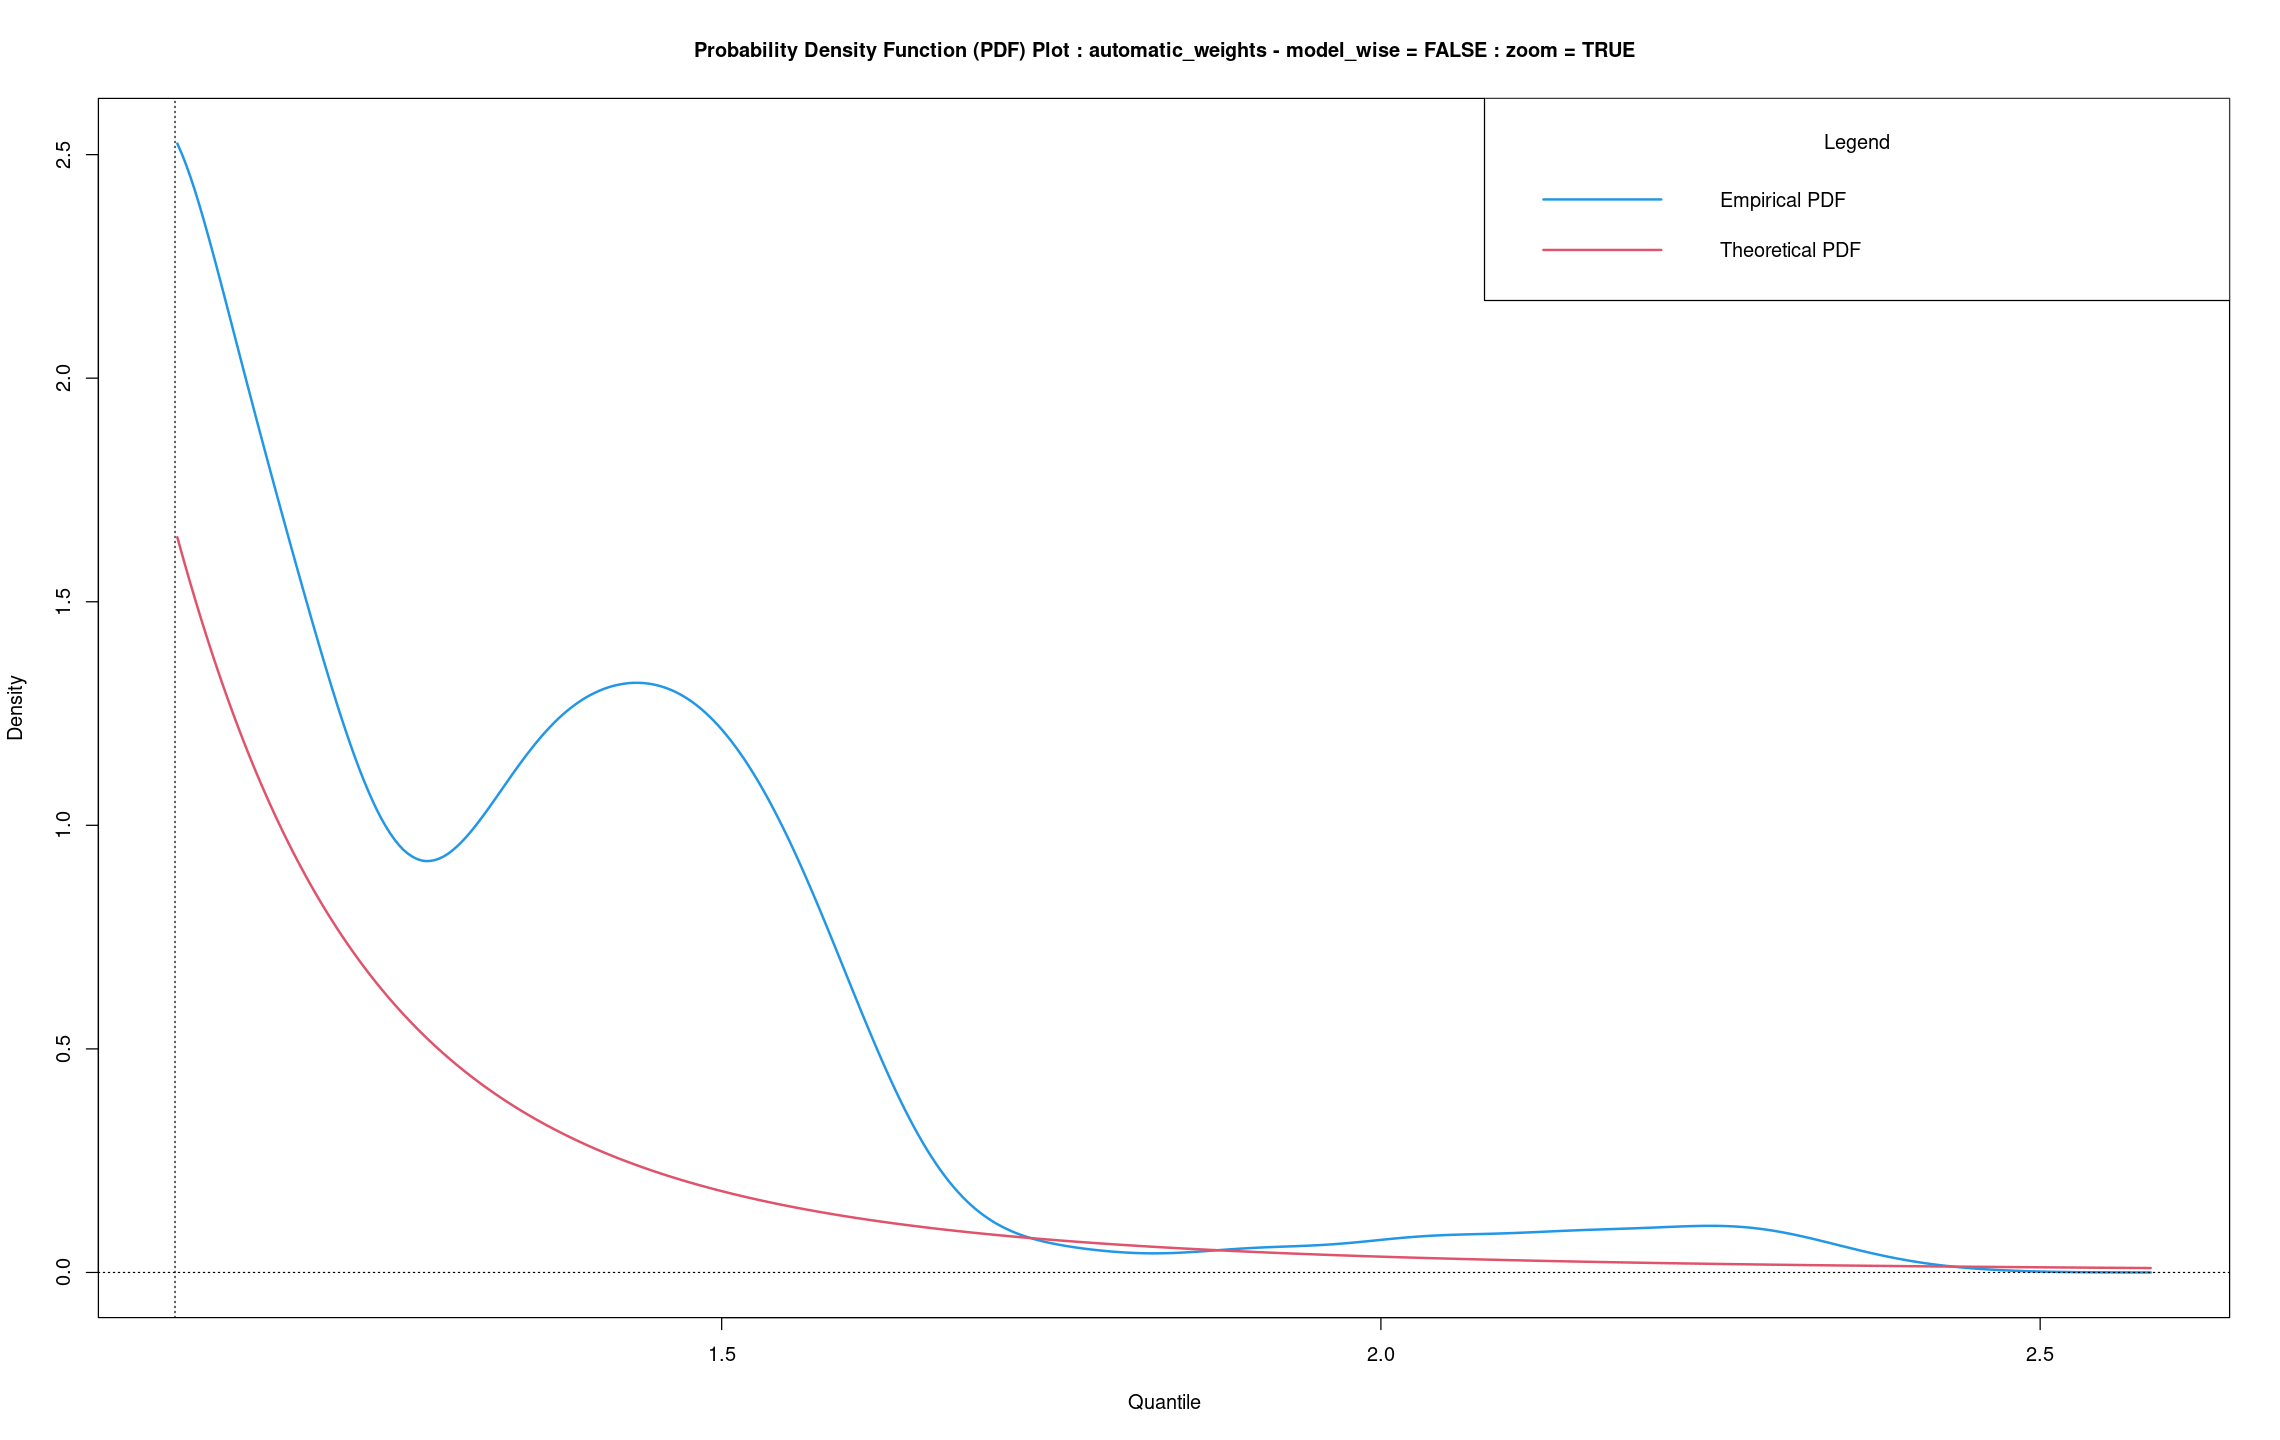

In [39]:
plot_gev_mixture_model_pdf(gev_mixture_model,
                           type = "automatic_weights",
                           model_wise = FALSE,
                           zoom = TRUE,
                           xlab = "Quantile",
                           ylab = "Density",
                           main = "Probability Density Function (PDF) Plot")

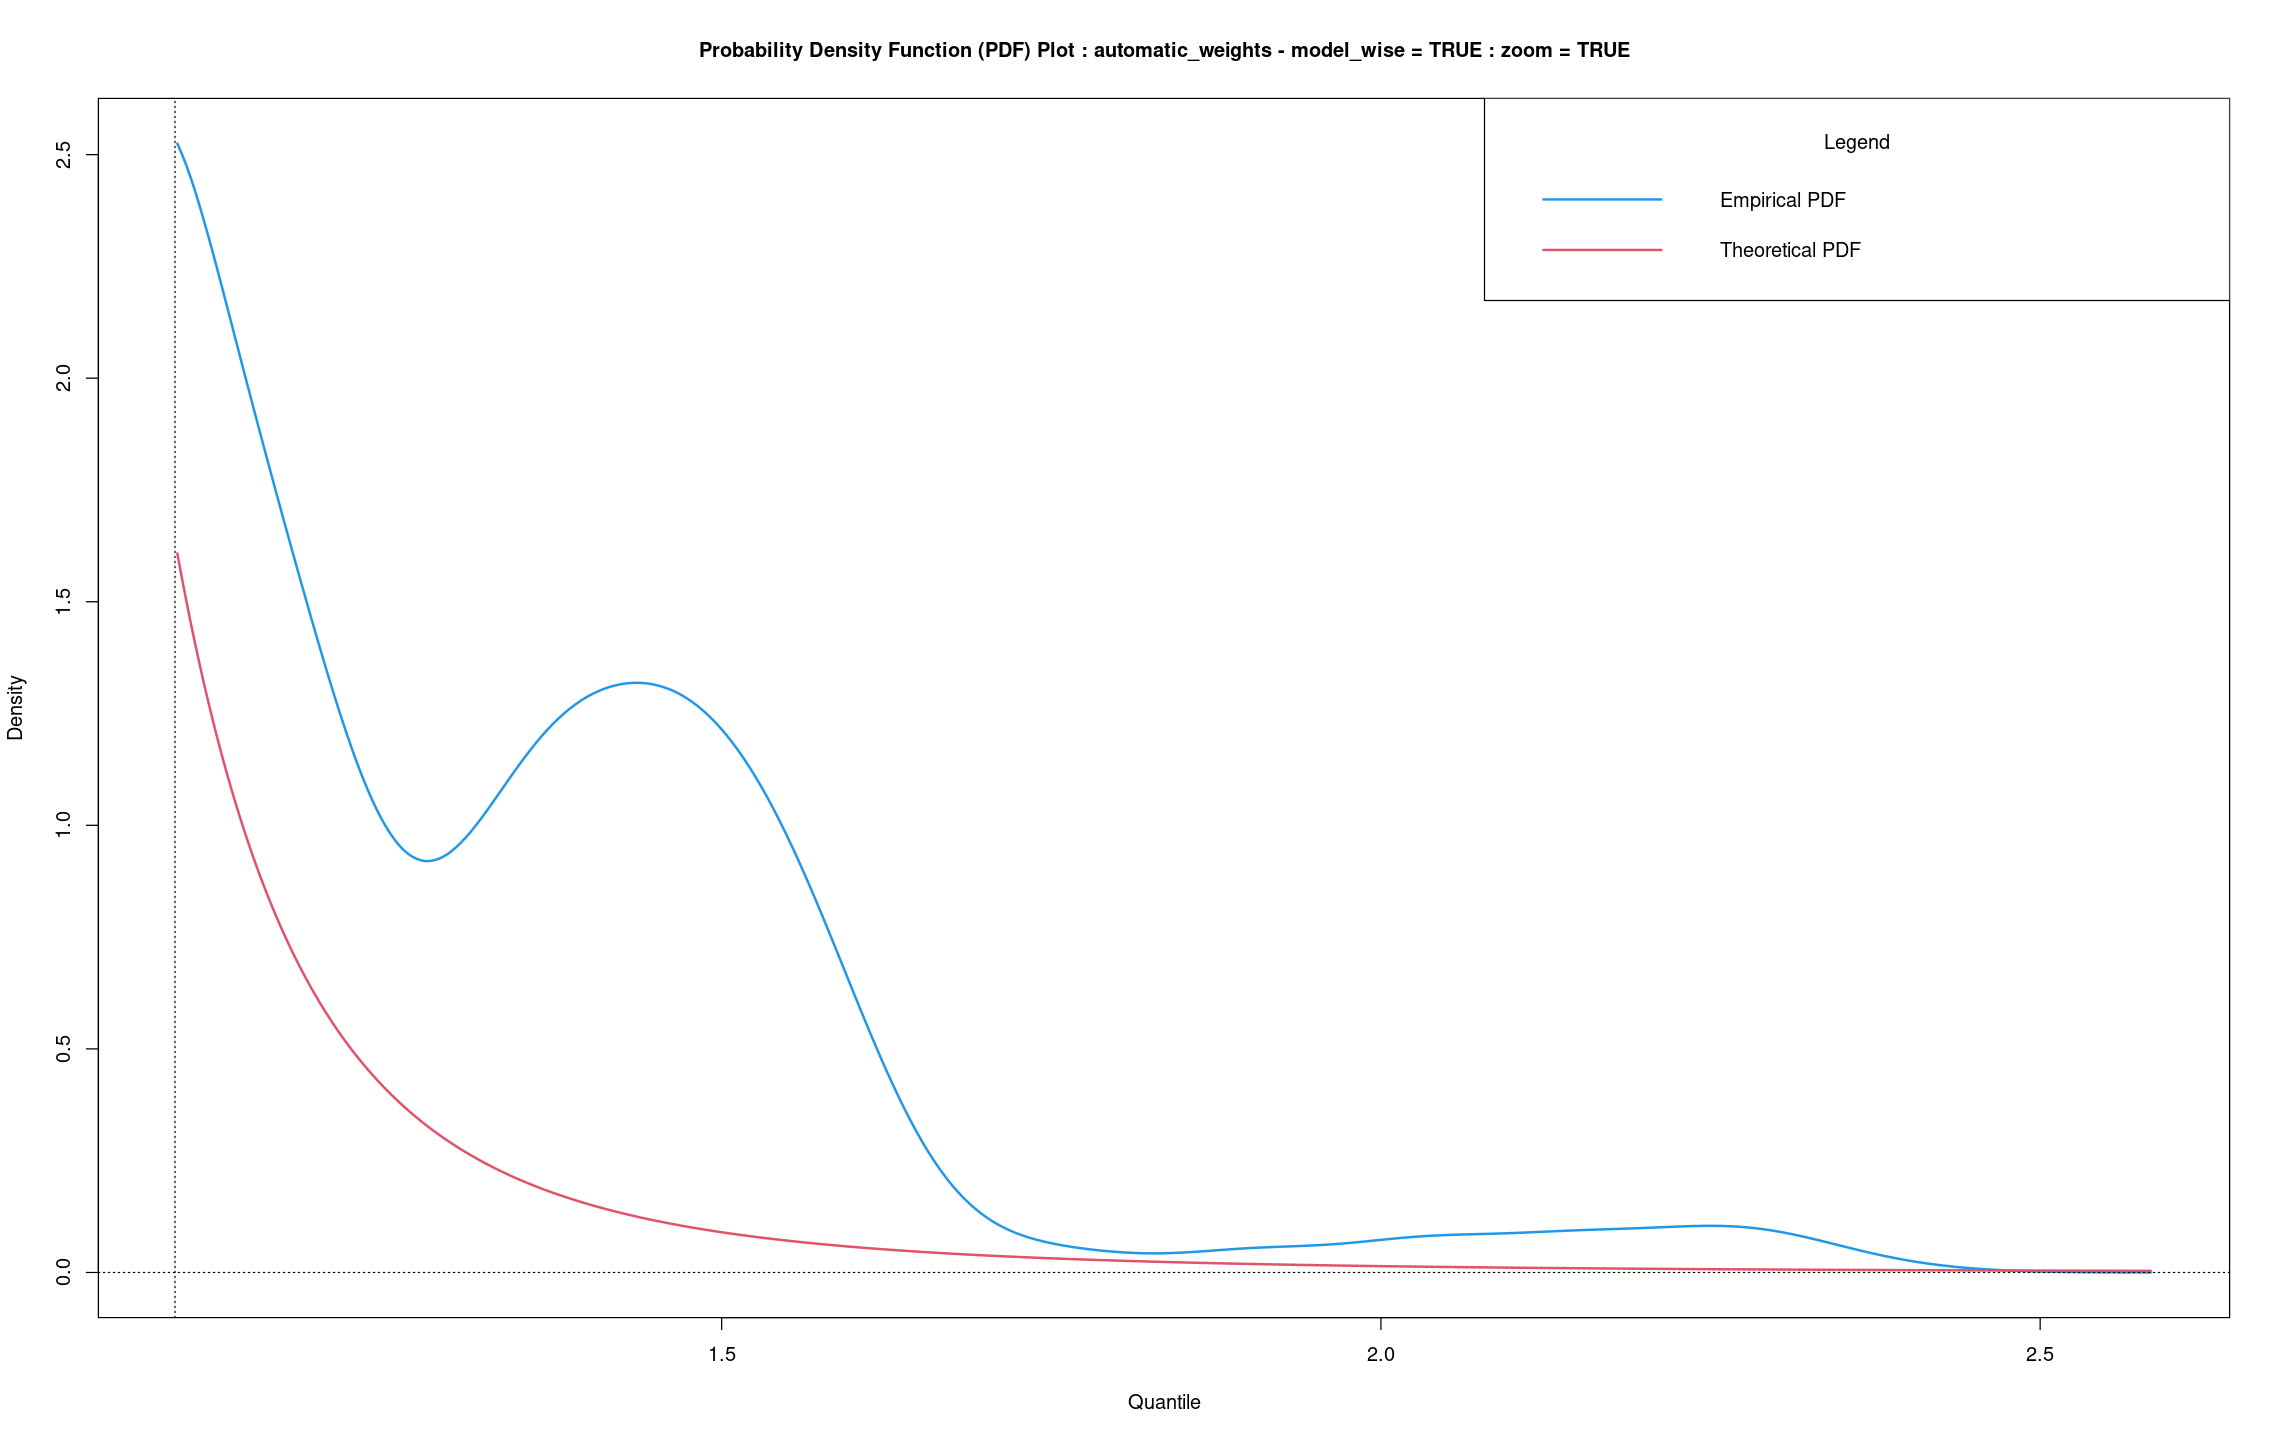

In [40]:
plot_gev_mixture_model_pdf(gev_mixture_model,
                           type = "automatic_weights",
                           model_wise = TRUE,
                           zoom = TRUE,
                           xlab = "Quantile",
                           ylab = "Density",
                           main = "Probability Density Function (PDF) Plot")

In [41]:
estimator_types <- c("automatic_weights_mw", 
                     "pessimistic_weights_mw", 
                     "identic_weights_mw", 
                     "automatic_weights_pw",
                     "pessimistic_weights_pw", 
                     "identic_weights_pw", 
                     "model_wise",
                     "parameter_wise",
                     "empirical")

In [42]:
alpha <- 10^(-14)

In [43]:
rl_mw <- estimate_gev_mixture_model_quantile(gev_mixture_model,
                                             alpha = alpha,
                                             confidence_level = 0.95,
                                             do.ci = TRUE,
                                             estimator_type = estimator_types[1])

rl_mw

[1] 10579.4399

In [44]:
rl_pw <- estimate_gev_mixture_model_quantile(gev_mixture_model,
                                             alpha = alpha,
                                             confidence_level = 0.95,
                                             do.ci = TRUE,
                                             estimator_type = estimator_types[4])

rl_pw

[1] 46190.23026

In [45]:
est_rl_pw <- suppressWarnings(estimate_gev_mixture_model_quantile(gev_mixture_model,
                                                                  alpha = alpha,
                                                                  confidence_level = 0.95,
                                                                  do.ci = TRUE,
                                                                  estimator_type = estimator_types[8]))

est_rl_pw

,lower,quantile,upper
,<dbl>,<dbl>,<dbl>
10,-49592.008256,10581.6401112,70755.288479
11,-36458.513361,7403.6109932,51265.735348
12,-43049.068060,8290.6889556,59630.445972
13,-17616.027084,3469.6211562,24555.269397
14,-14172.626127,2681.5439978,19535.714123
15,-25439.032904,4533.9685739,34506.970052
16,-17428.173822,3008.9295543,23446.032931
17,-18009.416245,3150.0992463,24309.614737
18,-15908.244718,2693.3075159,21294.859750


In [46]:
est_rl_pw_range <- range(as.matrix(est_rl_pw))

In [47]:
est_rl_mw <- suppressWarnings(estimate_gev_mixture_model_quantile(gev_mixture_model,
                                                                  alpha = alpha,
                                                                  confidence_level = 0.95,
                                                                  do.ci = TRUE,
                                                                  estimator_type = estimator_types[7]))
est_rl_mw

,lower,quantile,upper
,<dbl>,<dbl>,<dbl>
10,-49592.008256,10581.6401112,70755.288479
20,-24545.833157,3852.2608900,32250.354937
21,-30713.183154,4711.0811436,40135.345441
26,-5218.055220,788.7150049,6795.485230
29,-1896.857381,303.3015484,2503.460478
30,-6018.614695,921.7202294,7862.055154
32,-9348.537641,1229.5269941,11807.591629
33,-6551.680693,857.1940935,8266.068880
34,-1655.257889,235.7051696,2126.668228


In [48]:
est_rl_mw_range <- range(as.matrix(est_rl_mw))

est_rl_mw_range

[1] -49592.00826  70755.28848

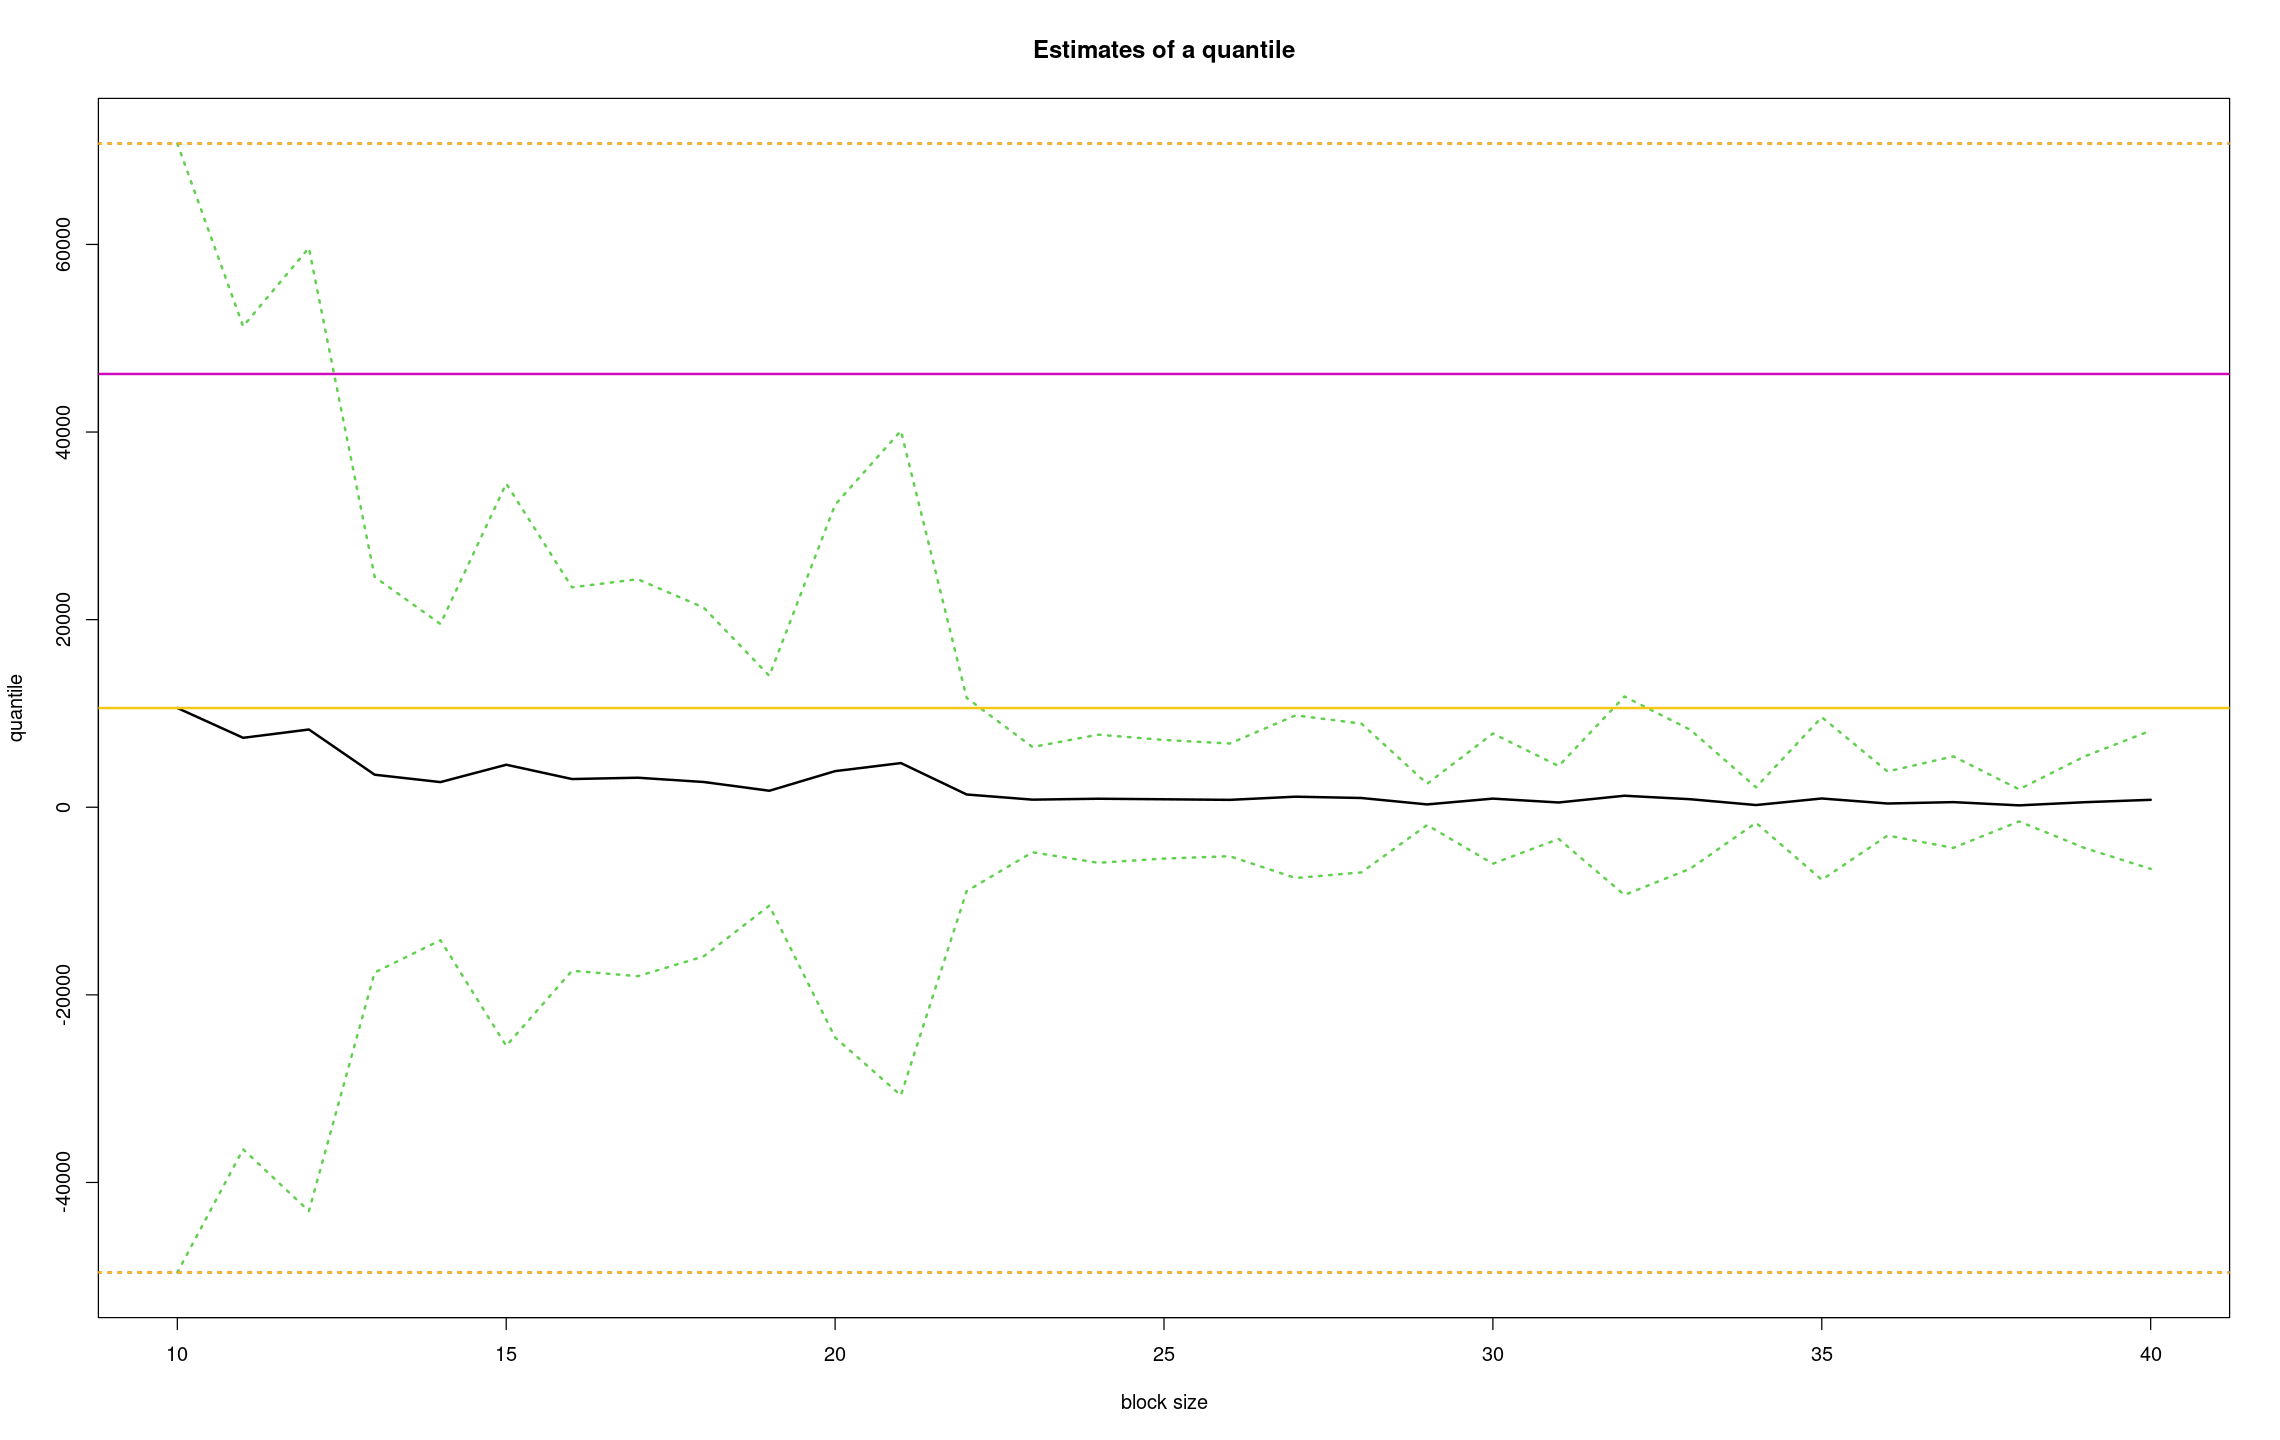

In [49]:
matplot(x = rownames(est_rl_pw), 
        y = est_rl_pw, 
        xlab = "block size",
        ylab = "quantile",
        main = "Estimates of a quantile",
        ylim = range(c(est_rl_pw_range, rl_pw)),
        cex = 1,
        cex.lab = 1,
        cex.axis = 1,
        type = "l", 
        lty = c("dotted", "solid", "dotted"), 
        lwd = c(2,2,2), 
        col = c(3, 1, 3))

abline(h = rl_mw, col = 7, lwd = 2)
abline(h = rl_pw, col = 6, lwd = 2)
abline(h = est_rl_pw_range, col = 6, lty = "dotted", lwd = 2)
abline(h = est_rl_mw_range, col = 7, lty = "dotted", lwd = 2)

In [120]:
# Legend:
# yellow: Quantile from GEV mixture model with respect to distribution functions
# pink: Quantile from GEV mixture model with respect to parameters
